### Census Income

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

#### Import Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read Data 

In [2]:
datac = pd.read_csv("adult.csv")

In [3]:
names = ['Age',
         'Workclass',
         'fnlwgt',
         'Education',
         "Education-num",
         'Marital-Status',
         'Occupation',
         'Relationship',
         'Race',
         'Sex',
         'Capital-gain',
         'Capital-loss',
         'Hours-per-week',
         'Native-country',
        'Income']
datac = pd.read_csv("adult.csv",names=names,na_values={
    'Workclass':[' ?'],
    'Occupation':[' ?'],
    'Native-country':[' ?']
})

In [4]:
datac = datac.dropna()

In [5]:
head = datac.head()
head

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Exploratory Data Analysis

In [6]:
print("Instances:\t",datac.shape[0])
print("\nAttributes:\t",datac.shape[1])
print("\nNumber of null values:\n",datac.isnull().sum())
print("\nNumber of unique values\n",datac.nunique())
print("\nNumber of Predicted values\n\n",datac['Income'].value_counts())

Instances:	 30162

Attributes:	 15

Number of null values:
 Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

Number of unique values
 Age                  72
Workclass             7
fnlwgt            20263
Education            16
Education-num        16
Marital-Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital-gain        118
Capital-loss         90
Hours-per-week       94
Native-country       41
Income                2
dtype: int64

Number of Predicted values

  <=50K    22654
 >50K      7508
Name: Income, dtype: int64


In [7]:
des = datac.describe(include = 'all')
des

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Correlation matrix

In [8]:
corr = datac.corr()
corr

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
Education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
Capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
Capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
Hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

f_datac = datac.apply(LabelEncoder().fit_transform)
f_datac

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38,0


#### Splitting the data

In [10]:
x = f_datac.drop(columns=['Income'])
y = f_datac['Income']

In [11]:
x.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country'],
      dtype='object')

In [12]:
x.shape

(30162, 14)

In [13]:
y.shape

(30162,)

#### Feature selection -- Correlation Matrix with Heatmap

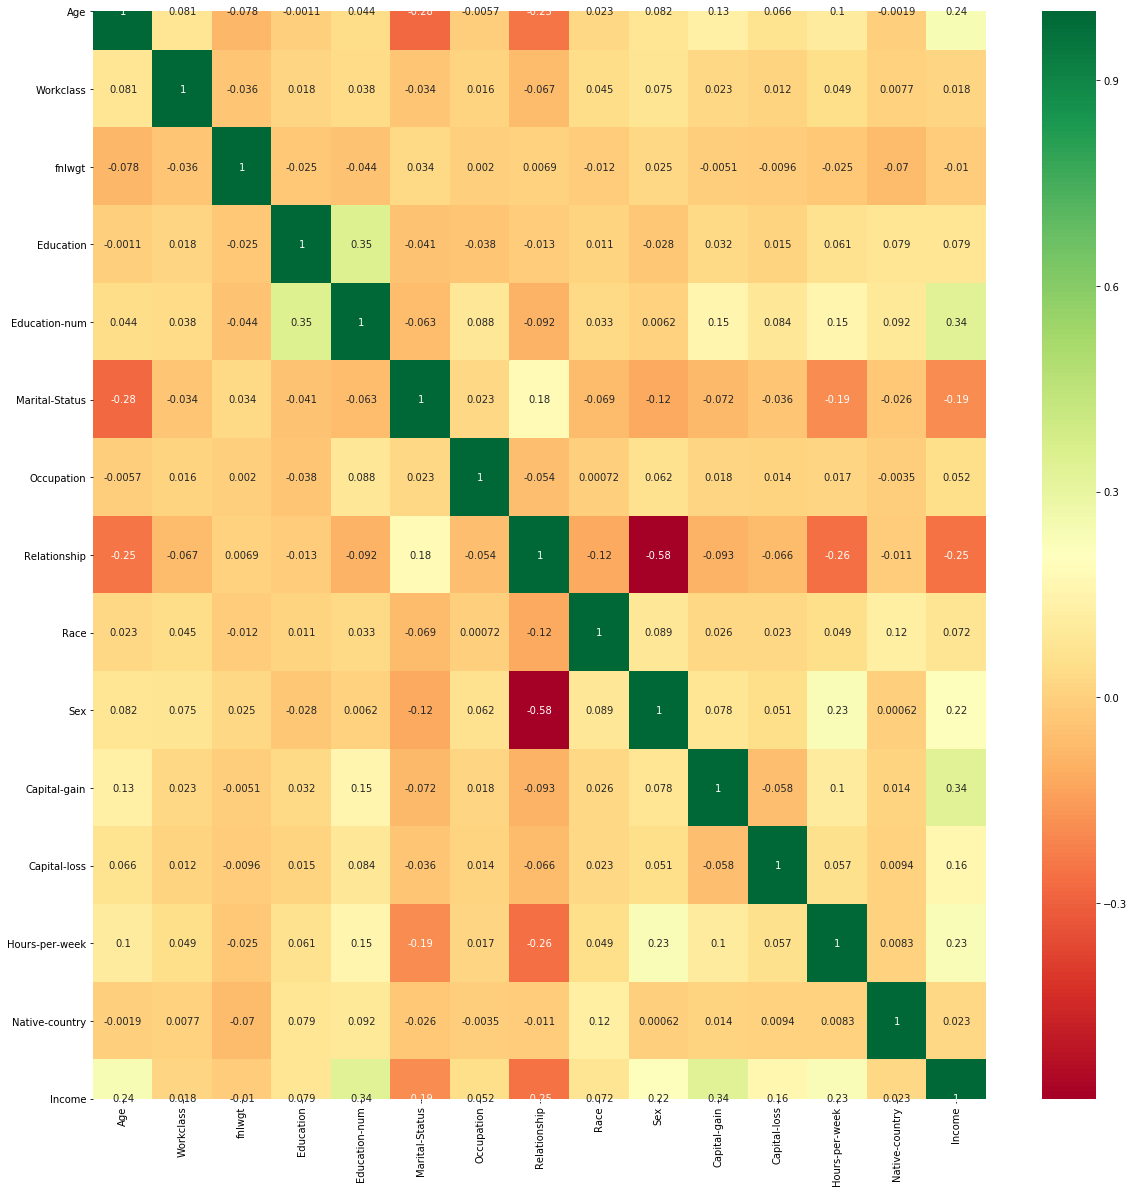

In [14]:
#get correlations of each features in dataset
corrmat = f_datac.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(f_datac[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Standardize the data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [17]:
stdsclr = StandardScaler()
x_train_std = stdsclr.fit_transform(x_train)
x_test_std = stdsclr.fit_transform(x_test)

In [20]:
x_train

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
22290,16,1,3651,11,8,0,12,1,4,0,0,0,54,38
8886,24,2,2701,3,1,2,4,0,4,1,0,0,39,25
4037,11,2,17441,0,5,0,7,1,4,0,0,0,39,38
4164,35,2,19019,8,10,2,7,5,4,0,0,0,19,38
31438,4,2,145,8,10,4,0,4,2,0,0,0,34,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23796,13,2,18699,15,9,2,3,0,4,1,0,0,49,38
21503,18,2,3162,11,8,4,6,1,1,1,0,0,39,0
32423,44,2,3503,1,6,6,5,1,4,0,0,0,29,38
21374,27,0,17663,11,8,2,2,0,4,1,0,0,39,38


In [19]:
y_train

22290    0
8886     0
4037     0
4164     1
31438    0
        ..
23796    0
21503    0
32423    0
21374    1
8990     0
Name: Income, Length: 20208, dtype: int32

In [21]:
x_train_std

array([[-0.41185542, -1.2570495 , -1.08744518, ..., -0.20626875,
         1.20232661,  0.26431091],
       [ 0.2000233 , -0.20978465, -1.25473555, ..., -0.20626875,
        -0.07368022, -1.8747998 ],
       [-0.79427963, -0.20978465,  1.34090648, ..., -0.20626875,
        -0.07368022,  0.26431091],
       ...,
       [ 1.72972011, -0.20978465, -1.11350726, ..., -0.20626875,
        -0.92435143,  0.26431091],
       [ 0.42947782, -2.30431435,  1.3799996 , ..., -0.20626875,
        -0.07368022,  0.26431091],
       [-0.56482511, -0.20978465,  0.67579522, ..., -0.20626875,
         1.62766222,  0.26431091]])

In [22]:
x_test_std

array([[-0.87235004, -1.25773617, -1.36904851, ..., -0.20751043,
         0.17938483,  0.26617091],
       [-0.87235004, -0.2072658 ,  1.63094957, ..., -0.20751043,
         1.1959499 ,  0.26617091],
       [-0.04070354, -0.2072658 ,  1.18444234, ..., -0.20751043,
        -0.07475644,  0.26617091],
       ...,
       [-0.11630777, -0.2072658 , -1.24844735, ..., -0.20751043,
        -0.07475644,  0.26617091],
       [-1.09916272, -0.2072658 , -0.65056975, ..., -0.20751043,
        -2.19260034,  0.26617091],
       [ 1.62258945,  0.84320456, -0.55012773, ..., -0.20751043,
        -0.07475644,  0.26617091]])

In [23]:
y_test.shape

(9954,)

In [24]:
x_train.shape

(20208, 14)

#### Calculating Accuracy

In [26]:
from sklearn.svm import SVC

In [27]:
models = SVC()
models.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
models.score(x_test_std,y_test)

0.8444846292947559